In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sys.path.append('/users/mtaranov/LongRange3D/')
from models import RandomForest, SVC
from metrics import ClassificationResult
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
contacts='PP_PE'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'
X_train = get_features(path+'X_train_thres_10.npy')
y_train = get_labels(path+'y_train_thres_10.npy')
X_valid = get_features(path+'X_valid_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')
X_test = get_features(path+'X_test_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')

In [4]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

In [5]:
X_train_pairs = X_train_normalized.reshape(X_train_normalized.shape[0],X_train_normalized.shape[2]*X_train_normalized.shape[3])
X_valid_pairs = X_valid_normalized.reshape(X_valid_normalized.shape[0],X_valid_normalized.shape[2]*X_valid_normalized.shape[3])
X_test_pairs = X_test_normalized.reshape(X_test_normalized.shape[0],X_test_normalized.shape[2]*X_test_normalized.shape[3])

# Random Forest

In [6]:
rf = RandomForest()

### with atac only

In [7]:
rf.train(X_train_pairs[:,:2], y_train)
preds_test = rf.predict(X_test_pairs[:,:2])
preds_train = rf.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

/users/mtaranov/LongRange3D/models.py:218: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(X, y)


On Test:
Balanced Accuracy: 63.41%	 auROC: 0.693	 auPRC: 0.694	 auPRG: 0.386
Recall at 5%|10%|20% FDR: 3.3%|4.2%|13.6%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 96.28%	 auROC: 0.986	 auPRC: 0.989	 auPRG: 0.984
Recall at 5%|10%|20% FDR: 95.6%|95.8%|97.7%	 Num Positives: 3065	 Num Negatives: 3065	 



### with genomic locations

In [8]:
rf.train(X_train_pairs, y_train)
preds_test = rf.predict(X_test_pairs)
preds_train = rf.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 76.53%	 auROC: 0.857	 auPRC: 0.867	 auPRG: 0.750
Recall at 5%|10%|20% FDR: 23.0%|51.8%|73.8%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 100.00%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 3065	 Num Negatives: 3065	 



### with distance only

In [9]:
rf.train(X_train_pairs[:,20:], y_train)
preds = rf.predict(X_test_pairs[:,20:])

rf.train(X_train_pairs[:,20:], y_train)
preds_test = rf.predict(X_test_pairs[:,20:])
preds_train = rf.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 77.92%	 auROC: 0.855	 auPRC: 0.861	 auPRG: 0.755
Recall at 5%|10%|20% FDR: 0.0%|55.3%|76.5%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 99.98%	 auROC: 1.000	 auPRC: 1.000	 auPRG: 1.000
Recall at 5%|10%|20% FDR: 100.0%|100.0%|100.0%	 Num Positives: 3065	 Num Negatives: 3065	 



### w/o genomic locations

In [10]:
rf.train(X_train_pairs[:,:20], y_train)
preds_test = rf.predict(X_test_pairs[:,:20])
preds_train = rf.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 74.89%	 auROC: 0.846	 auPRC: 0.861	 auPRG: 0.728
Recall at 5%|10%|20% FDR: 27.3%|57.0%|71.0%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 99.58%	 auROC: 0.999	 auPRC: 0.999	 auPRG: 0.999
Recall at 5%|10%|20% FDR: 99.8%|99.8%|99.8%	 Num Positives: 3065	 Num Negatives: 3065	 



In [11]:
pred_probs_train = rf.predict(X_train_pairs[:,:20])
pred_probs_valid = rf.predict(X_valid_pairs[:,:20])
pred_probs_test = rf.predict(X_test_pairs[:,:20])

# Print prediction

In [12]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [13]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

In [14]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

Some tests on adjacency matrix:
Some tests on adjacency matrix:


In [15]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

1.0
(60, 60)
Limit: 1.0


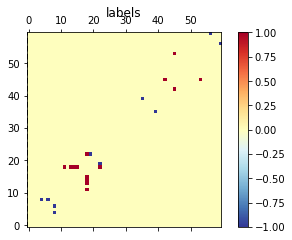

1.0
(60, 60)
Limit: 1.0


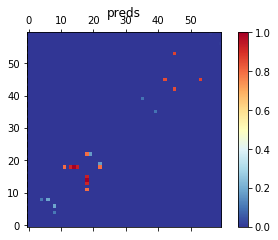

In [16]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )

# SVC

In [17]:
svc = SVC()
from sklearn.svm import SVC as scikit_SVC

# linear - SVM

In [18]:
svc.classifier= scikit_SVC(probability=True, kernel='linear')

### with atac only

In [19]:
svc.train(X_train_pairs[:,:2], y_train)
preds_test = svc.predict(X_test_pairs[:,:2])
preds_train = svc.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


On Test:
Balanced Accuracy: 56.43%	 auROC: 0.630	 auPRC: 0.624	 auPRG: 0.255
Recall at 5%|10%|20% FDR: 0.6%|0.6%|6.2%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 58.21%	 auROC: 0.638	 auPRC: 0.627	 auPRG: 0.270
Recall at 5%|10%|20% FDR: 0.0%|0.0%|2.0%	 Num Positives: 3065	 Num Negatives: 3065	 



### with genomic locations

In [20]:
svc.train(X_train_pairs, y_train)
preds_test = svc.predict(X_test_pairs)
preds_train = svc.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 66.44%	 auROC: 0.739	 auPRC: 0.733	 auPRG: 0.479
Recall at 5%|10%|20% FDR: 1.3%|1.9%|35.5%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 67.88%	 auROC: 0.754	 auPRC: 0.738	 auPRG: 0.519
Recall at 5%|10%|20% FDR: 0.0%|6.5%|31.8%	 Num Positives: 3065	 Num Negatives: 3065	 



### with distance only

In [21]:
svc.train(X_train_pairs[:,20:], y_train)
preds_test = svc.predict(X_test_pairs[:,20:])
preds_train = svc.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 35.53%	 auROC: 0.493	 auPRC: 0.488	 auPRG: -0.019
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 35.15%	 auROC: 0.488	 auPRC: 0.487	 auPRG: -0.034
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 3065	 Num Negatives: 3065	 



### w/o genomic locations

In [22]:
svc.train(X_train_pairs[:,:20], y_train)
preds_test = svc.predict(X_test_pairs[:,:20])
preds_train = svc.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 66.40%	 auROC: 0.739	 auPRC: 0.733	 auPRG: 0.479
Recall at 5%|10%|20% FDR: 1.3%|1.9%|35.3%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 67.90%	 auROC: 0.754	 auPRC: 0.738	 auPRG: 0.519
Recall at 5%|10%|20% FDR: 0.0%|6.1%|31.3%	 Num Positives: 3065	 Num Negatives: 3065	 



# RBF - SVM

In [23]:
svc.classifier= scikit_SVC(probability=True, kernel='rbf')

### with atac only

In [24]:
svc.train(X_train_pairs[:,:2], y_train)
preds_test = svc.predict(X_test_pairs[:,:2])
preds_train = svc.predict(X_train_pairs[:,:2])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 59.59%	 auROC: 0.631	 auPRC: 0.605	 auPRG: 0.268
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 59.92%	 auROC: 0.640	 auPRC: 0.622	 auPRG: 0.274
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 3065	 Num Negatives: 3065	 



### with genomic locations

In [25]:
svc.train(X_train_pairs, y_train)
preds_test = svc.predict(X_test_pairs)
preds_train = svc.predict(X_train_pairs)
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 69.01%	 auROC: 0.774	 auPRC: 0.769	 auPRG: 0.558
Recall at 5%|10%|20% FDR: 1.3%|9.5%|46.9%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 76.54%	 auROC: 0.841	 auPRC: 0.843	 auPRG: 0.719
Recall at 5%|10%|20% FDR: 12.1%|49.9%|72.4%	 Num Positives: 3065	 Num Negatives: 3065	 



### with distance only

In [26]:
svc.train(X_train_pairs[:,20:], y_train)
preds_test = svc.predict(X_test_pairs[:,20:])
preds_train = svc.predict(X_train_pairs[:,20:])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 48.91%	 auROC: 0.516	 auPRC: 0.510	 auPRG: 0.032
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 49.46%	 auROC: 0.522	 auPRC: 0.508	 auPRG: 0.050
Recall at 5%|10%|20% FDR: 0.1%|0.1%|0.1%	 Num Positives: 3065	 Num Negatives: 3065	 



### w/o genomic locations

In [27]:
svc.train(X_train_pairs[:,:20], y_train)
preds_test = svc.predict(X_test_pairs[:,:20])
preds_train = svc.predict(X_train_pairs[:,:20])
print ('On Test:\n{}\n'.format(ClassificationResult(y_test, preds_test)))
print ('On Train:\n{}\n'.format(ClassificationResult(y_train, preds_train)))

On Test:
Balanced Accuracy: 69.68%	 auROC: 0.772	 auPRC: 0.768	 auPRG: 0.555
Recall at 5%|10%|20% FDR: 2.2%|13.1%|42.1%	 Num Positives: 1189	 Num Negatives: 1189	 

On Train:
Balanced Accuracy: 75.48%	 auROC: 0.832	 auPRC: 0.835	 auPRG: 0.696
Recall at 5%|10%|20% FDR: 8.3%|47.8%|69.2%	 Num Positives: 3065	 Num Negatives: 3065	 

